## Lab 7.1


### Activity 1
Name: `sun-area`


* Size of Sonoran desert: 260,000 square kilometers
* Power of solar radiation per unit area on earth: 1,368 W/m2
* In 2017, the average annual electricity consumption for a U.S. residential utility customer was 10,399 kilo-watt hours (kWh).
* Estimated efficiency of solar thermal power plant: 20%

1. What fraction of the Sonoran desert needs to be covered with solar thermal power plants to provide the energy consumption of 50 million residential utility customers? 
2. How much area is needed in $km^2$? Enter into quiz questions `sun-area`.

Use one of the packages discussed in class that is providing unit support. Do not do the work for the unit package, i.e. do not do any unit conversions manually. 


Note: Power, which is energy per unit time has the unit Watt.

In [36]:
import astropy.units as u

area1 = 260000 * u.km**2
powerArea = 1368 * u.watt/(u.m**2)
powerTime = 10399*10**3 * (u.watt)*(u.hr)
powerInput = 50*10**6*(powerTime/ (8760*u.hr))*5

areaNeeded = (powerInput/powerArea).to('km**2')
fraction = areaNeeded/area1
print(fraction)
print(areaNeeded)

0.0008343879727711739
216.9408729205052 km2


### Activity 2
Name: `intercept-noise-data`

Copy and paste the following into a code cell to define two arrays


```
x_noise,y_noise = (array([-1.5  , -1.275, -1.05 , -0.825, -0.6  , -0.375, -0.15 ,  0.075,
         0.3  ,  0.525,  0.75 ,  0.975,  1.2  ,  1.425,  1.65 ,  1.875,
         2.1  ,  2.325,  2.55 ,  2.775,  3.   ]),
 array([-1.0099668 ,  0.3322034 ,  1.81796586,  1.64583542,  2.92846064,
         2.77085473,  0.90521025,  0.3576988 ,  0.16287582, -1.81826416,
        -1.99273992, -4.13833605, -5.66522596, -5.25260809, -6.72657049,
        -6.44398528, -6.88801454, -6.2339154 , -5.59783631, -3.86732275,
        -1.54614799]))
```

Find the $x$ coordinate of the inflection point of `y_noise` as a function of `x_noise` by first smoothing the data via spline interpolation and then locating the minimum of the magnitude of the second derivative. Observe the following instructions:
* use the SciPy interpolation functions `interpolate.splrep` and `interpolate.splev` 
* the evaluation array `x_new` should have four times as many points and the same range as `x_noise`
* starting with a smoothing parameter `s=0` increase the parameter in increments of `1` until the interpolation only shows one inflection point by visual inspection; adopt that value for `s`
* do not use a loop
* enter the x value of the `x_new` array where the inflection point of `y_new` is located (do not interpolate in `x_new` to find the sub-grid location) into the quiz `intercept-noise-data`

x: [0.6686747]


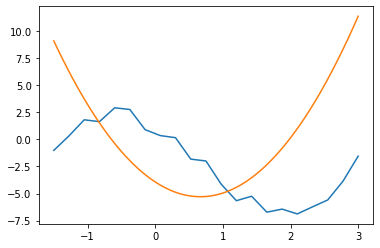

In [63]:
from scipy.interpolate import splev, splrep
import numpy as np
import matplotlib.pyplot as plt

x_noise,y_noise = (np.array([-1.5  , -1.275, -1.05 , -0.825, -0.6  , -0.375, -0.15 ,  0.075,
         0.3  ,  0.525,  0.75 ,  0.975,  1.2  ,  1.425,  1.65 ,  1.875,
         2.1  ,  2.325,  2.55 ,  2.775,  3.   ]),
 np.array([-1.0099668 ,  0.3322034 ,  1.81796586,  1.64583542,  2.92846064,
         2.77085473,  0.90521025,  0.3576988 ,  0.16287582, -1.81826416,
        -1.99273992, -4.13833605, -5.66522596, -5.25260809, -6.72657049,
        -6.44398528, -6.88801454, -6.2339154 , -5.59783631, -3.86732275,
        -1.54614799]))

size = 5
spl = splrep(x_noise, y_noise, s=size)
x_new = np.linspace(x_noise[0], x_noise[len(x_noise)-1], 4*len(x_noise))
y_new = splev(x_new, spl, der=1)
ind = np.where(y_new==min(y_new))
print('x: {}'.format(x_new[ind]))

plt.plot(x_noise, y_noise, '-', x_new, y_new)
plt.show()